## CMM 262 Winter 2019 Midterm Single Cell Analysis Module

**To upload:**
Do this analysis in a jupyter notebook, open as HTML file, then save as PDF.


For this section of the midterm we are going to analyze a 10X dataset of 931 Brain Cells from an E18 Mouse using [scanpy](https://scanpy.readthedocs.io/en/latest/basic_usage.html)

The data that you will need to analyze is located in: `/oasis/tscc/scratch/biom200/cmm262/Module_4/midterm_data`

This directory contains `.mtx` and `.tsv` files.

### Importing necessary packages below:
Below are the possible python packages that you may want to use in your analysis. If you use the packages below, remember that packages are called by whatever name you give them. For example, if you use the import functions as they are written below, we have written that we will use "np" when we call numpy. 

In [2]:
import scanpy.api as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=170, color_map='viridis')  
sc.logging.print_versions()

/home/jiz225/miniconda3/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.11.0


### The goal of this midterm is to first filter our data, determine which cells are most similar to each other (cluster the cells), and finally find some genes that are indicative of each cluster of cells.

### Loading data below:

**Remember, data is in the path below:** 
`/oasis/tscc/scratch/biom200/cmm262/Module_4/midterm_data`

In [3]:
adata = sc.read_10x_mtx('/oasis/tscc/scratch/biom200/cmm262/Module_4/midterm_data',  
    var_names='gene_symbols', cache=True) 


... reading from cache file cache/oasis-tscc-scratch-biom200-cmm262-Module_4-midterm_data-matrix.h5ad


---

**Question 1 (2 pts):** Take a quick look at your data using violin plots. Plot both the number of counts per cell and genes per cell. 

*Note:* Use scanpy's violin plotting function

In [4]:
print('Total number of genes before filtering: {:d}'.format(adata.n_vars))
print('Total number of cells before filtering: {:d}'.format(adata.n_obs))

Total number of genes before filtering: 27998
Total number of cells before filtering: 931


In [5]:
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['n_genes'] = (adata.X > 0).sum(1)
adata.obs['log_n_counts'] = np.log(adata.obs['n_counts'])
#adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [6]:
print(adata.obs.head())
raw_obs_col = adata.obs.columns
print(raw_obs_col)

                    n_counts  n_genes  log_n_counts
AAACCTGGTCTCGTTC-1    9419.0     3073      9.150484
AAACGGGAGCCACGTC-1    5717.0     2284      8.651199
AAACGGGAGCGAGAAA-1    5189.0     2105      8.554296
AAACGGGCACACCGAC-1   13760.0     3618      9.529521
AAACGGGTCGCCAGCA-1   15808.0     4004      9.668271
Index(['n_counts', 'n_genes', 'log_n_counts'], dtype='object')


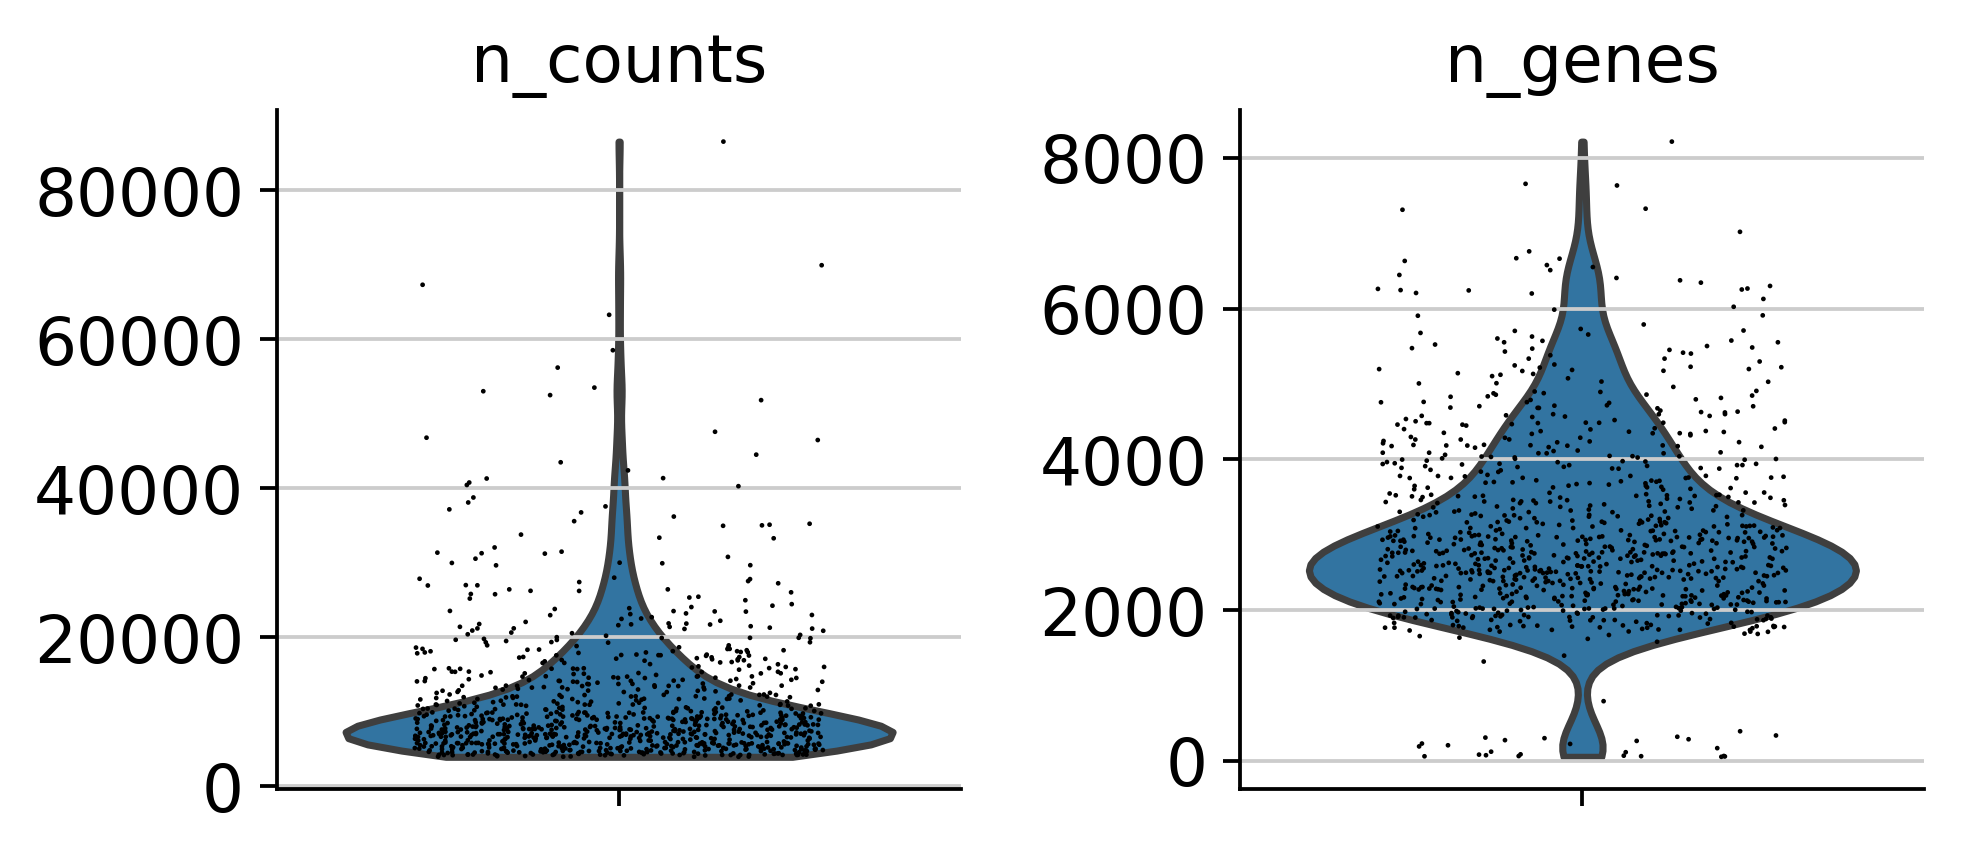

In [7]:
sc.pl.violin(adata, [raw_obs_col[0], raw_obs_col[1]],jitter=0.3, multi_panel=True, cut=0)

In [8]:
### A
sc.pp.filter_cells(adata, min_genes = 100)
print('Number of cells after 100 min genes filter: {:d}'.format(adata.n_obs))

### B
sc.pp.filter_genes(adata, min_cells = 5)
print('Number of genes after 5 min cell filter: {:d}'.format(adata.n_vars))

### C
sc.pp.filter_genes(adata, min_counts = 15)
print('Number of genes after 15 min counts filter: {:d}'.format(adata.n_vars))

filtered out 10 cells that haveless than 100 genes expressed
Number of cells after 100 min genes filter: 921
filtered out 14706 genes that are detectedin less than 5 cells
Number of genes after 5 min cell filter: 13292
filtered out 1560 genes that are detectedin less than 15 counts
Number of genes after 15 min counts filter: 11732


In [9]:
print('Total number of genes: {:d}'.format(adata.n_vars))
print('Total number of cell: {:d}'.format(adata.n_obs))

#adata.obs['f_'+raw_obs_col[0]] = adata.X.sum(1)
#adata.obs['f_'+raw_obs_col[1]] = (adata.X > 0).sum(1)
#adata.obs['f_'+raw_obs_col[2]] = np.log(adata.obs['f_'+raw_obs_col[0]])
#print(adata.obs.head())

#filter_obs_col = adata.obs.columns[3:]
#print(filter_obs_col)

Total number of genes: 11732
Total number of cell: 921


In [10]:
adata.layers["counts"] = adata.X.copy()

In [11]:
### A
sc.pp.normalize_total(adata, target_sum=1e6)
#adata.obs['CPM_'+filter_obs_col[0]] = adata.X.sum(1)
#adata.obs['CPM_'+filter_obs_col[1]] = (adata.X > 0).sum(1)
#adata.obs['CPM_'+filter_obs_col[2]] = np.log(adata.obs['CPM_'+filter_obs_col[0]])

### B
sc.pp.log1p(adata)
#adata.obs['norm_'+filter_obs_col[0]] = adata.X.sum(1)
#adata.obs['norm_'+filter_obs_col[1]] = (adata.X > 0).sum(1)

Normalizing counts per cell.
    finished (0:00:00):normalized adata.X


In [12]:
adata.raw = adata
adata.obs['norm_'+raw_obs_col[0]] = adata.X.sum(1)
adata.obs['norm_'+raw_obs_col[1]] = (adata.X > 0).sum(1)
#adata.obs['f_'+raw_obs_col[2]] = np.log(adata.obs['f_'+raw_obs_col[0]])

In [13]:
adata.obs.head()

,n_counts,n_genes,log_n_counts,norm_n_counts,norm_n_genes
AAACCTGGTCTCGTTC-1,9419.0,3073,9.150484,16010.655273,3066
AAACGGGAGCCACGTC-1,5717.0,2284,8.651199,12784.798828,2274
AAACGGGAGCGAGAAA-1,5189.0,2105,8.554296,11999.691406,2098
AAACGGGCACACCGAC-1,13760.0,3618,9.529521,17960.828125,3604
AAACGGGTCGCCAGCA-1,15808.0,4004,9.668271,19198.376953,3976


In [14]:
adata

AnnData object with n_obs × n_vars = 921 × 11732 
    obs: 'n_counts', 'n_genes', 'log_n_counts', 'norm_n_counts', 'norm_n_genes'
    var: 'gene_ids', 'n_cells', 'n_counts'
    layers: 'counts'

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


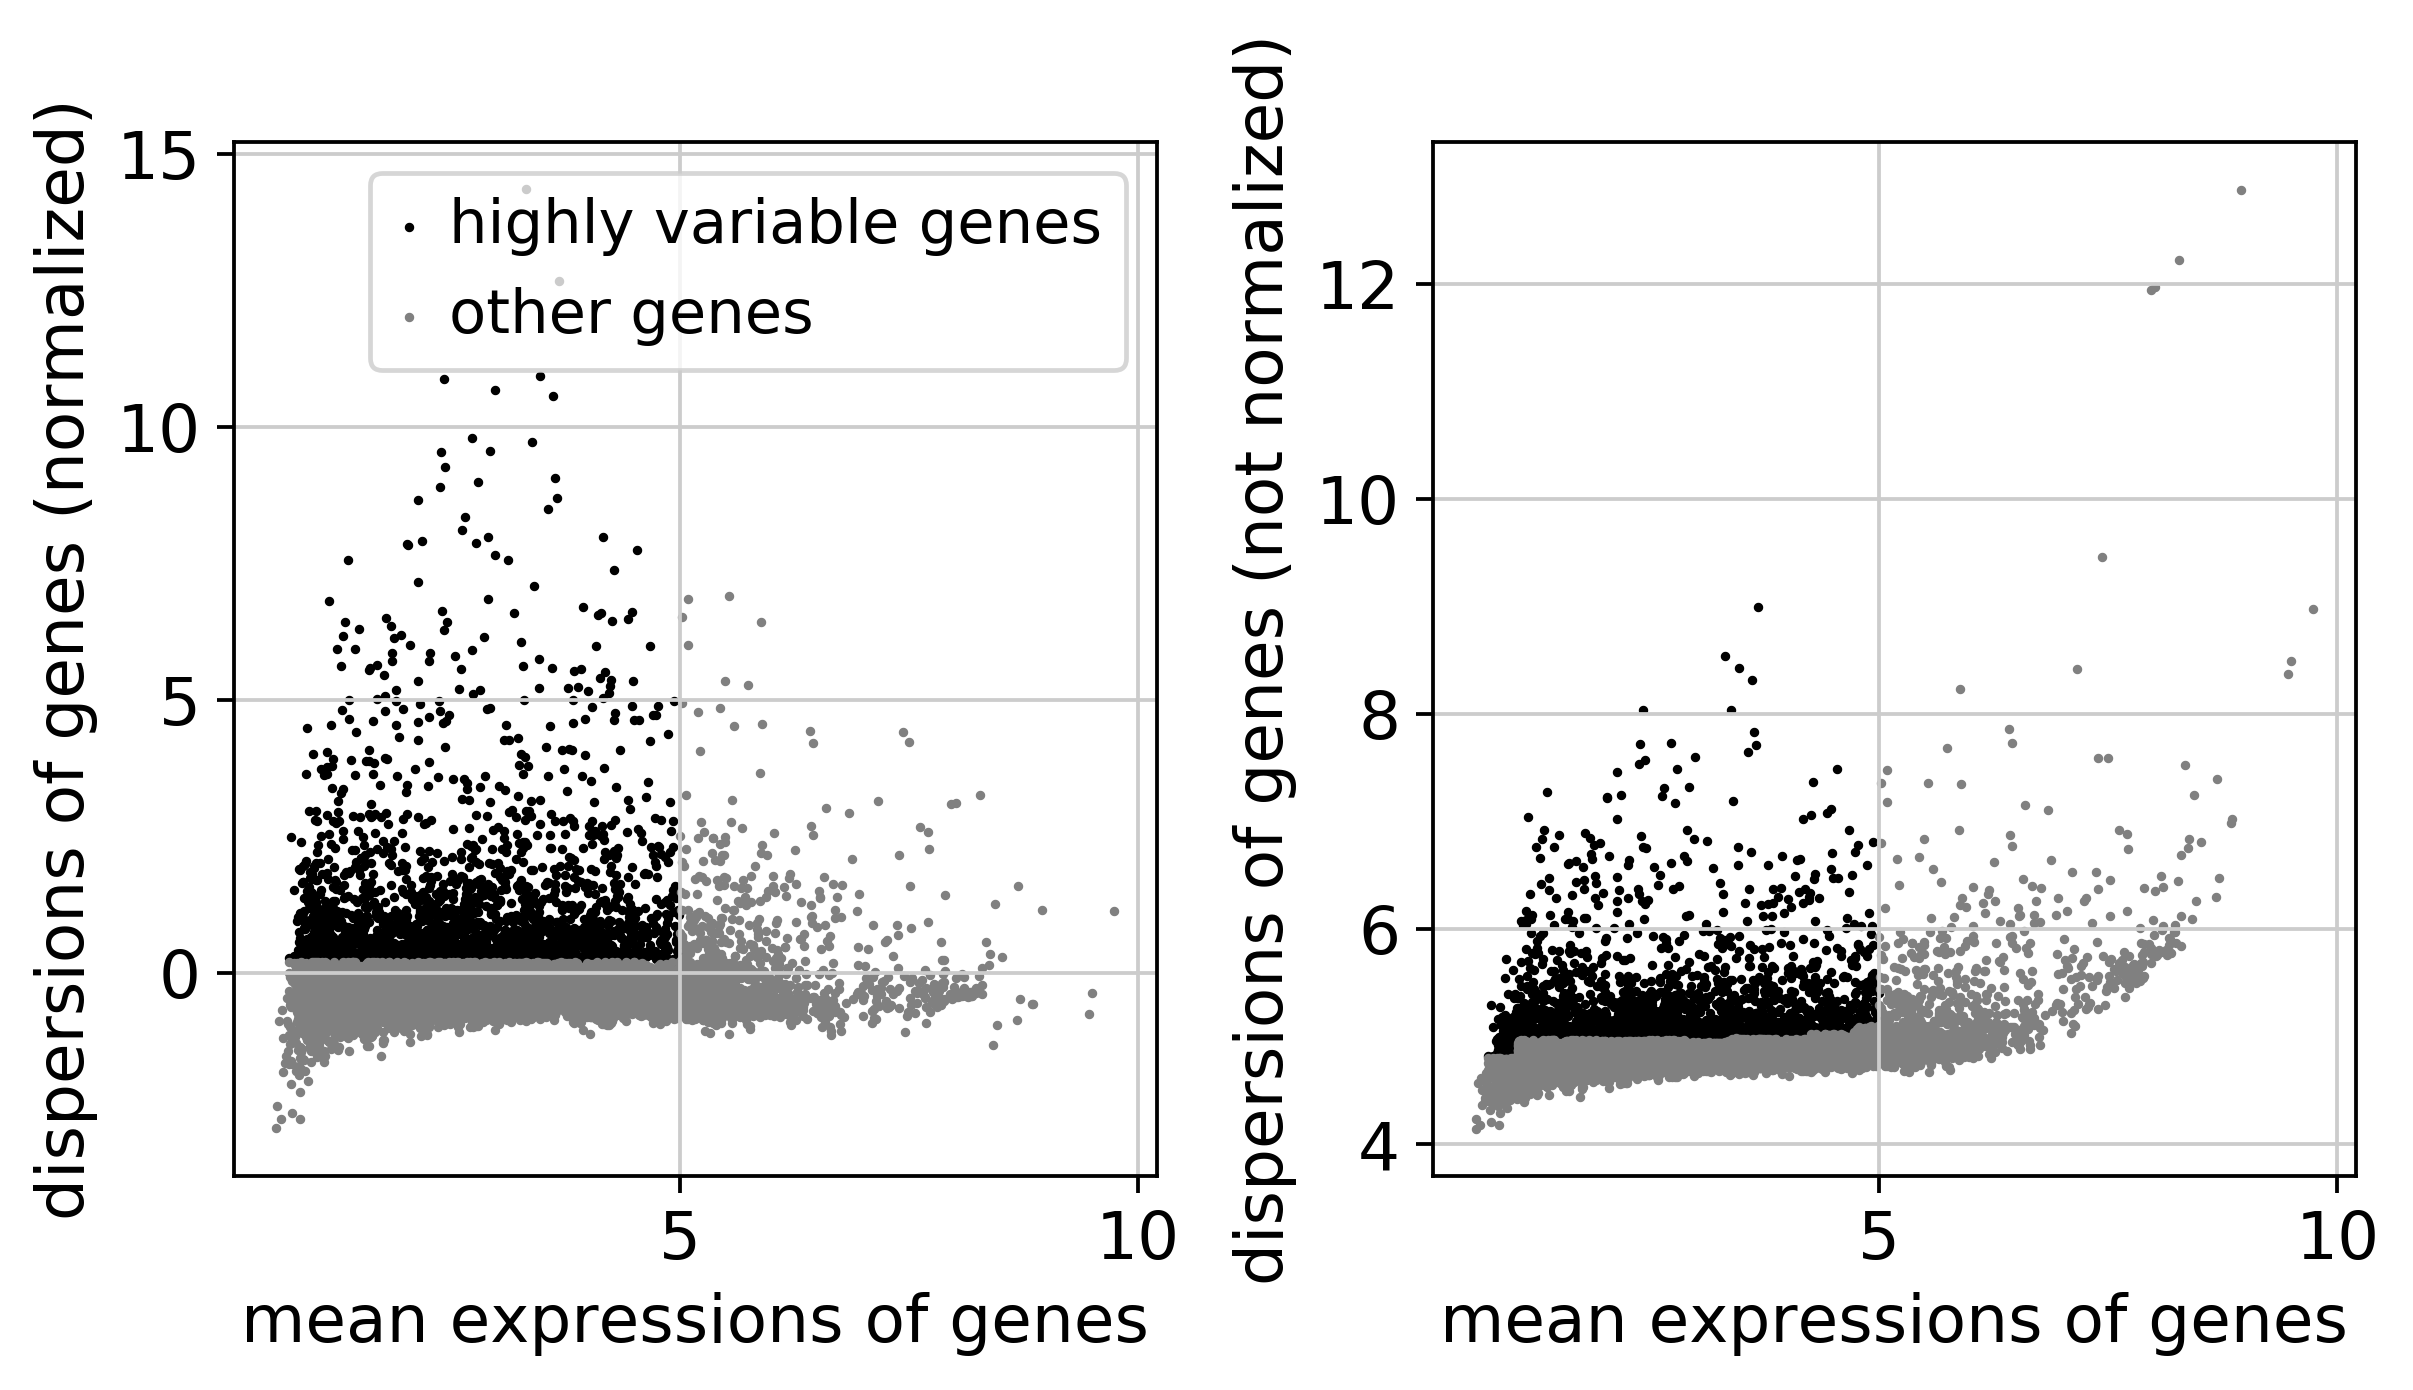

In [15]:
### A
sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=5, min_disp=0.2)
sc.pl.highly_variable_genes(adata)

In [16]:
### B
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))


 Number of highly variable genes: 2210


computing PCA with n_comps = 800
computing PCA on highly variable genes
    finished (0:00:01)


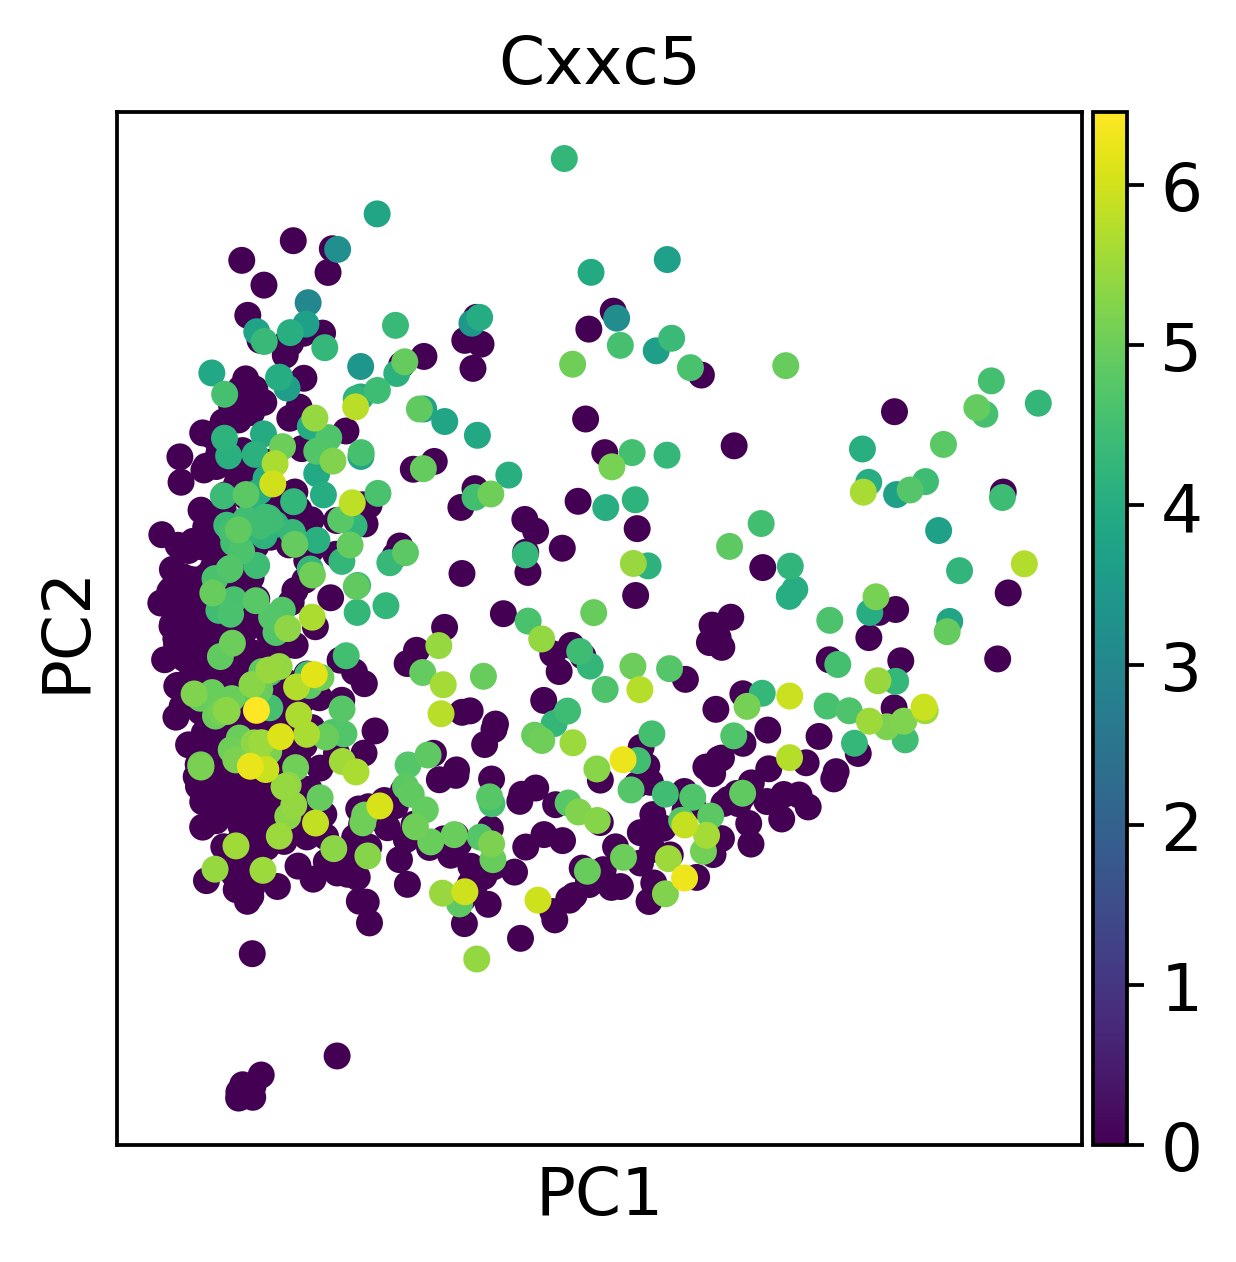

In [17]:
gene = adata.var[adata.var.highly_variable == True].sort_values(by=['dispersions_norm'],ascending=False).index[int(np.sum(adata.var['highly_variable'])/2)]
sc.pp.pca(adata, n_comps=800, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca(adata, color = gene, components=['1,2'])


Text(0, 0.5, 'cumulative explained variance')

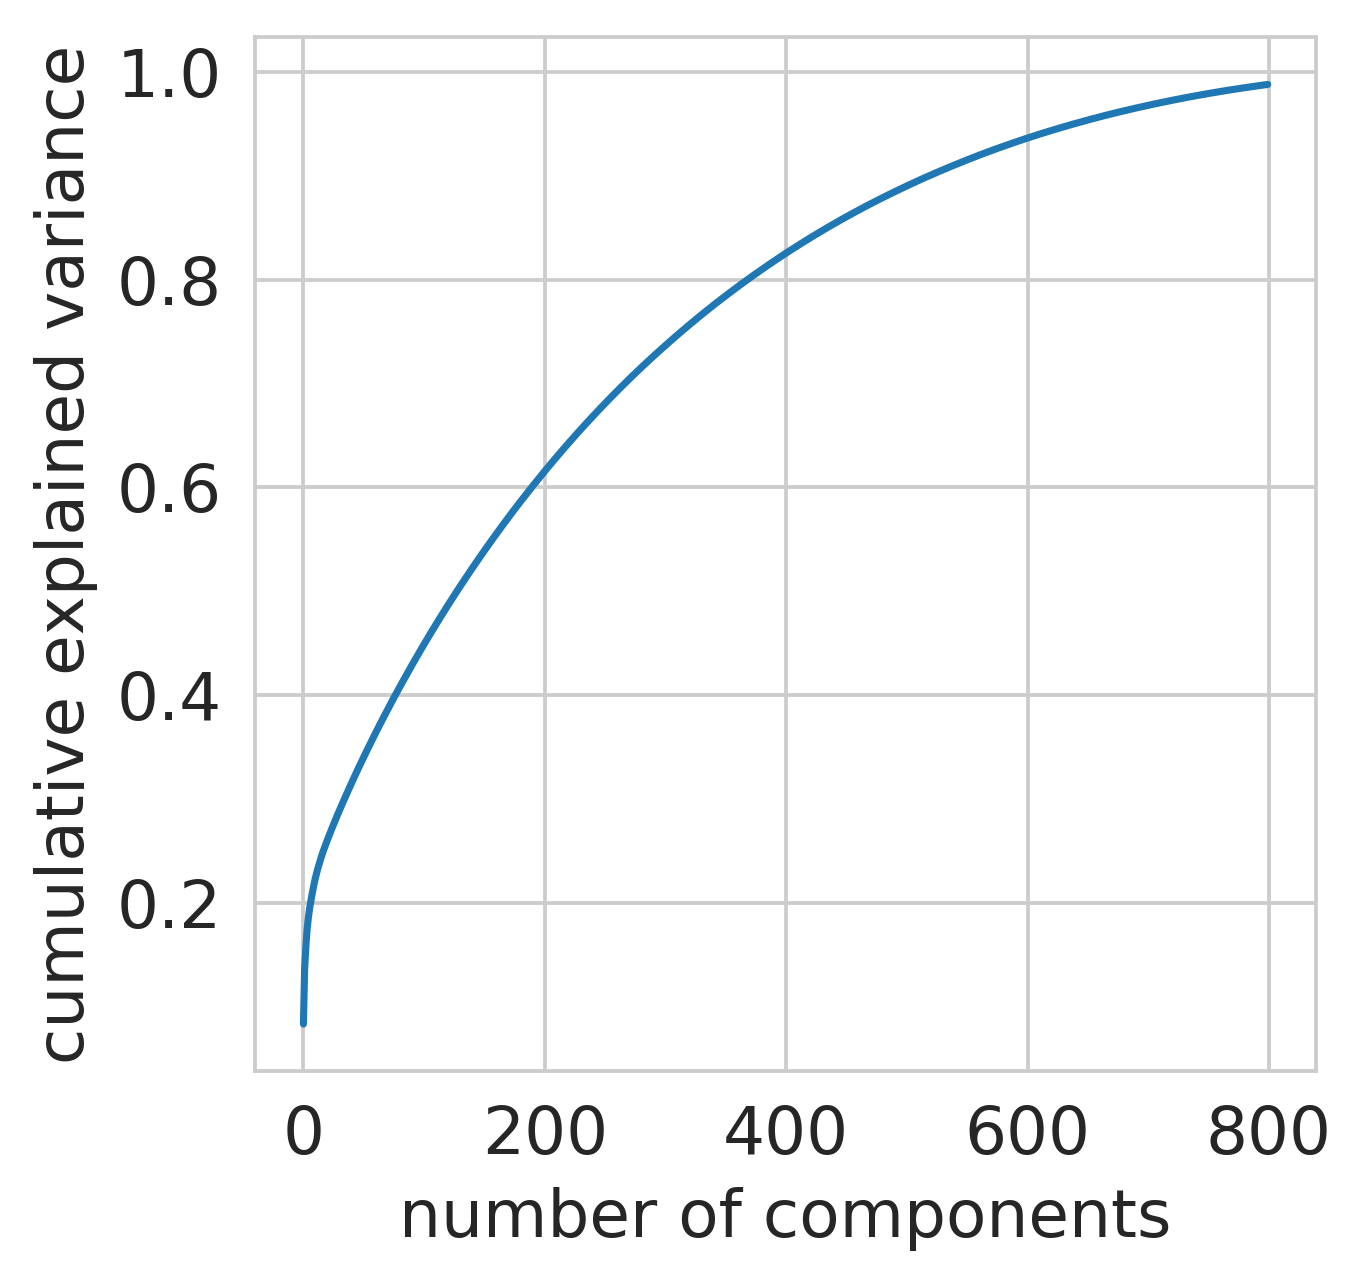

In [19]:
### A
sns.set_style("whitegrid")

plt.plot(np.cumsum(adata.uns['pca']['variance_ratio']))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [20]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 10)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:02)


computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:00:03)


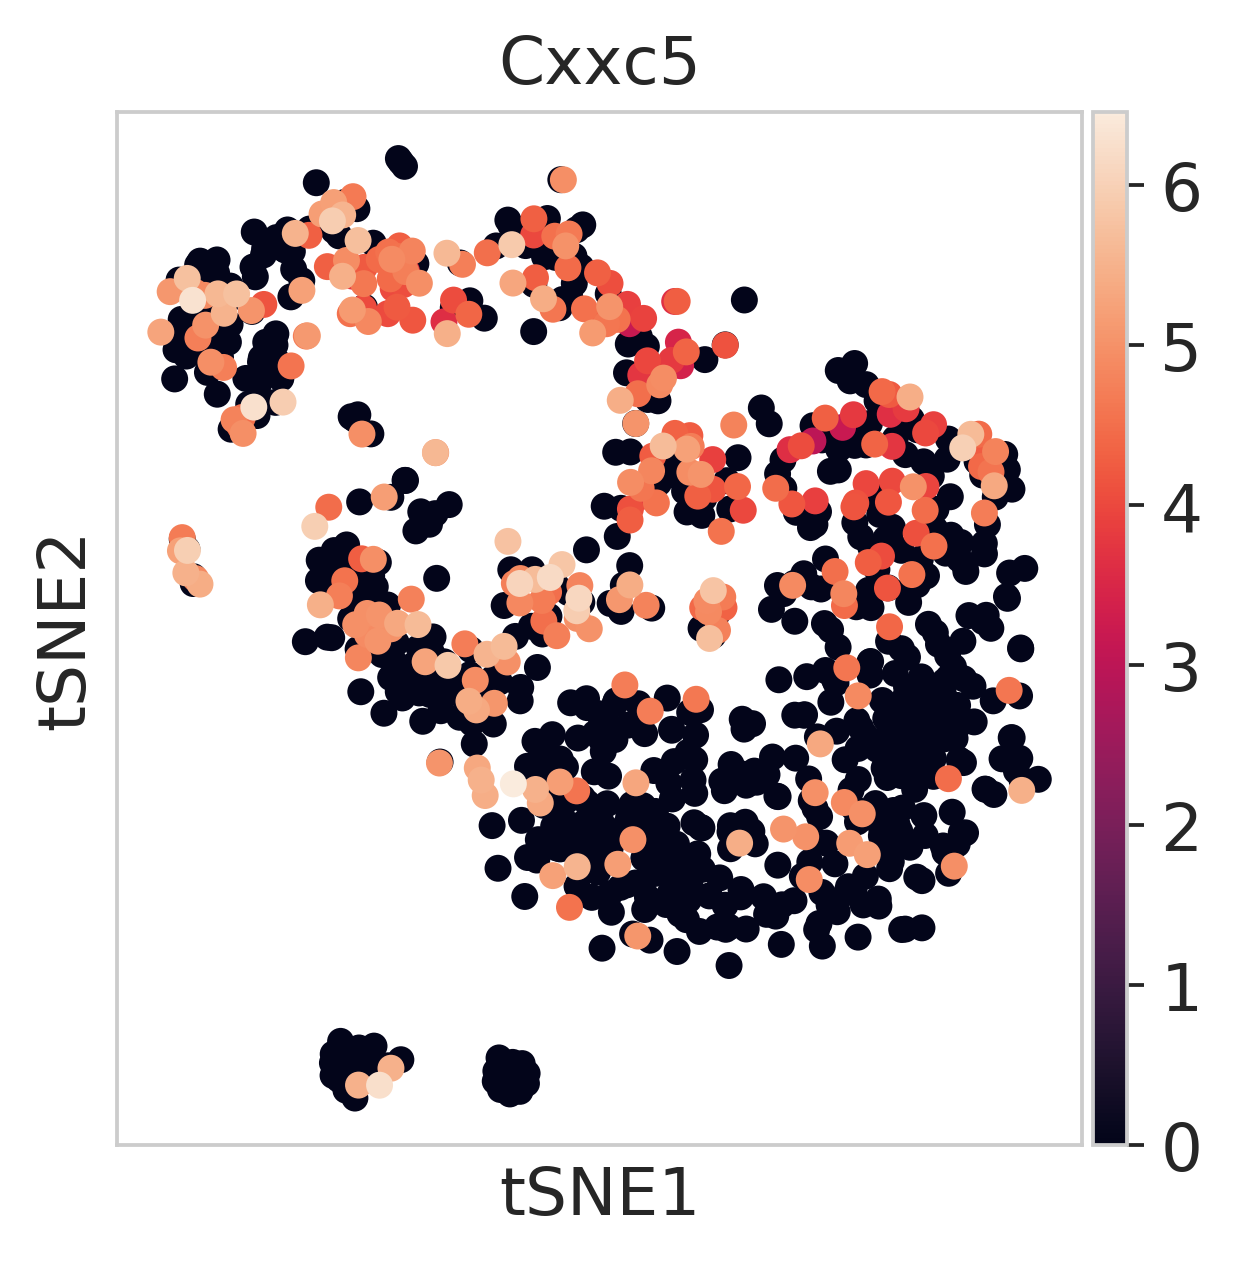

In [21]:
sc.tl.tsne(adata, n_pcs = 30, n_jobs = 1) 
sc.pl.tsne(adata, color= gene, components='all')

In [24]:
sc.tl.louvain(adata, key_added='louvain_default')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)


In [36]:
print('\n','Number of louvain clusters: {:d}'.format(len(np.unique(adata.obs.louvain_default))))


 Number of louvain clusters: 12


ranking genes
    finished (0:00:01)


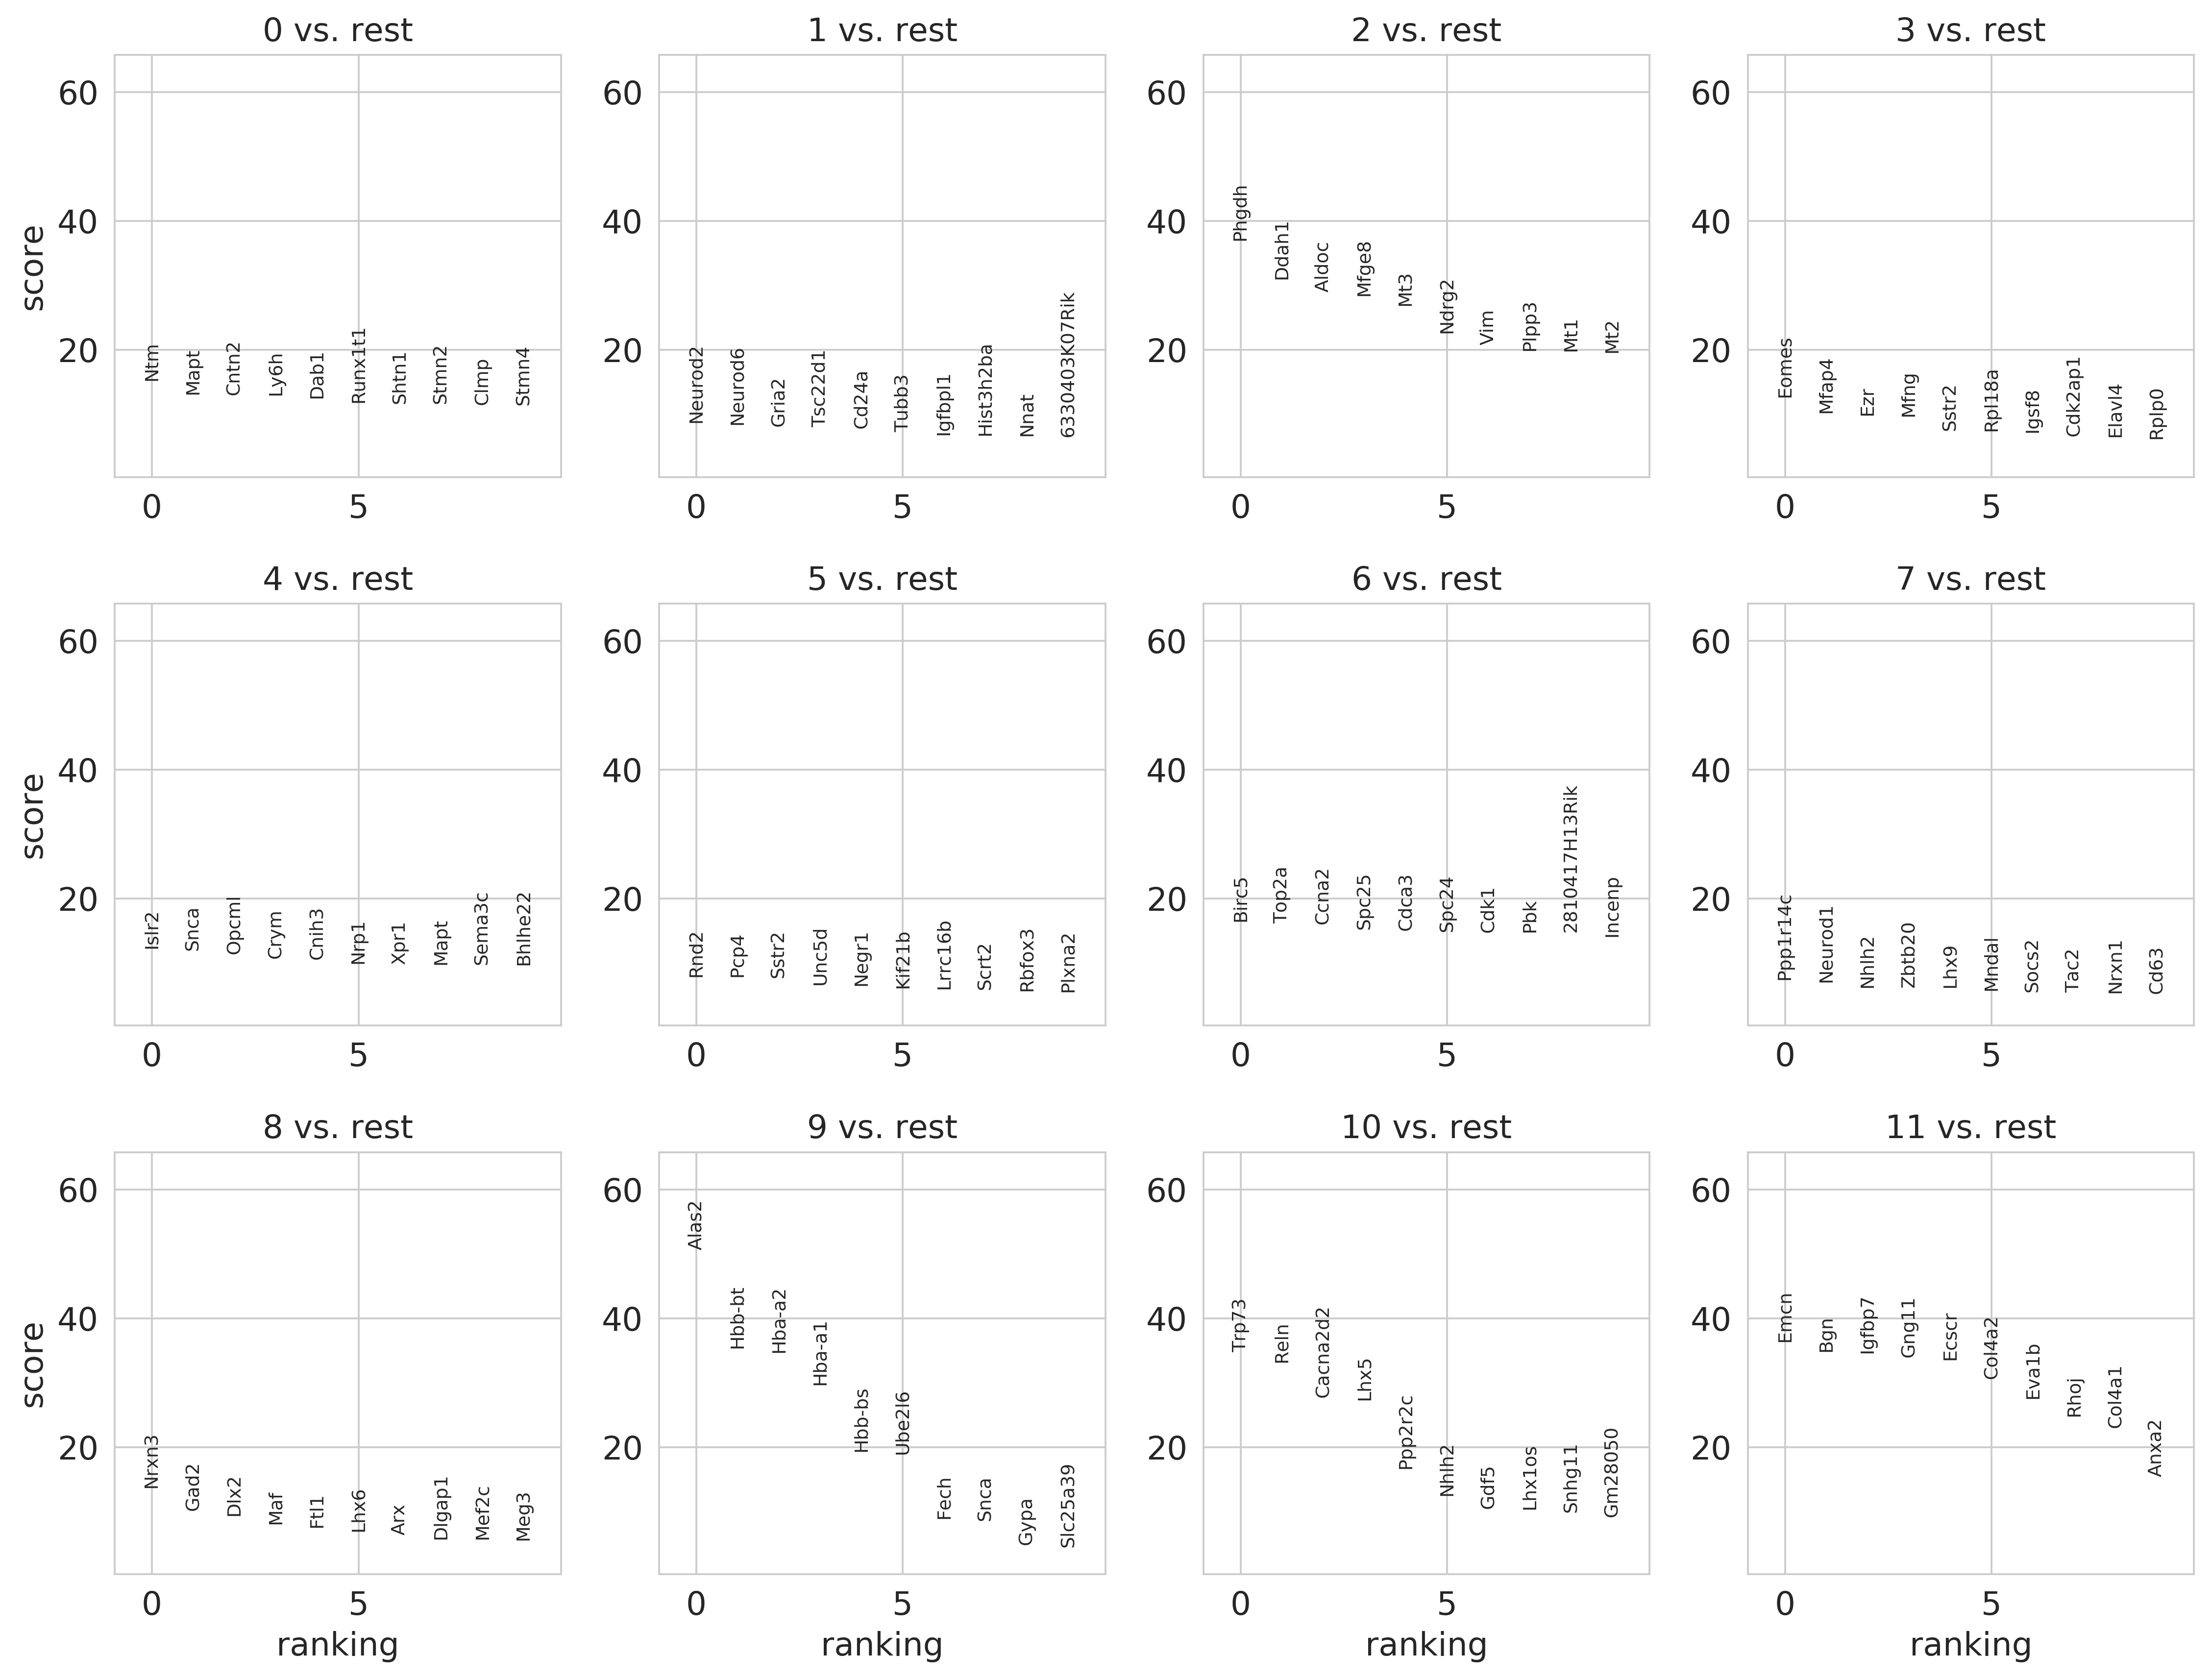

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ntm,Neurod2,Phgdh,Eomes,Islr2,Rnd2,Birc5,Ppp1r14c,Nrxn3,Alas2,Trp73,Emcn
1,Mapt,Neurod6,Ddah1,Mfap4,Snca,Pcp4,Top2a,Neurod1,Gad2,Hbb-bt,Reln,Bgn
2,Cntn2,Gria2,Aldoc,Ezr,Opcml,Sstr2,Ccna2,Nhlh2,Dlx2,Hba-a2,Cacna2d2,Igfbp7
3,Ly6h,Tsc22d1,Mfge8,Mfng,Crym,Unc5d,Spc25,Zbtb20,Maf,Hba-a1,Lhx5,Gng11
4,Dab1,Cd24a,Mt3,Sstr2,Cnih3,Negr1,Cdca3,Lhx9,Ftl1,Hbb-bs,Ppp2r2c,Ecscr
5,Runx1t1,Tubb3,Ndrg2,Rpl18a,Nrp1,Kif21b,Spc24,Mndal,Lhx6,Ube2l6,Nhlh2,Col4a2
6,Shtn1,Igfbpl1,Vim,Igsf8,Xpr1,Lrrc16b,Cdk1,Socs2,Arx,Fech,Gdf5,Eva1b
7,Stmn2,Hist3h2ba,Plpp3,Cdk2ap1,Mapt,Scrt2,Pbk,Tac2,Dlgap1,Snca,Lhx1os,Rhoj
8,Clmp,Nnat,Mt1,Elavl4,Sema3c,Rbfox3,2810417H13Rik,Nrxn1,Mef2c,Gypa,Snhg11,Col4a1
9,Stmn4,6330403K07Rik,Mt2,Rplp0,Bhlhe22,Plxna2,Incenp,Cd63,Meg3,Slc25a39,Gm28050,Anxa2


In [37]:
sc.tl.rank_genes_groups(adata, groupby='louvain_default', key_added='rank_genes_default')
sc.pl.rank_genes_groups(adata, key='rank_genes_default', n_genes = 10)
pd.DataFrame(adata.uns['rank_genes_default']['names']).head(10)